# Data Exploration using Python Libraries

You will use the boston housing dataset to perform simple data exploration.




## Dataset

There are 14 attributes in each case of the dataset. It is used to predict one f the two target attributes: (i) NOX and (ii) MEDV

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

## Load the Dataset

Read in the boston.csv file as Pandas dataframe and output the first 5 and last 5 rows.

In [1]:
import pandas as pd
import os 

os.getcwd()

df = pd.read_csv('boston.csv')

# output the first 5 rows
df.head()

# output the last 5 rows
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


## Output the description & dimension of the data


In [2]:
# output the description
df.info()

# dimension
print("\nDimension of the dataframe: ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB

Dimension of the dataframe:  (506, 14)


## Check if there are any null values in any column

To detect NaN values, use either Pandas .isna() or .isnull(). These two methods will display the complete dataframe and show True/False values for each cell.

- An handy method is isnull().values.any() or isna().values.any()

In [3]:
# df.isnull().values.any()

# df.isna().values.any()
# df.isnull()

## Create a Scatterplot using any feature and the targer MEDV


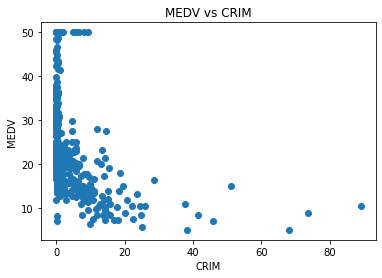

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# make a scatterplot using any feature and the target MEDV
plt.scatter(df.crim, df.medv)
plt.title("MEDV vs CRIM")
plt.xlabel("CRIM")
plt.ylabel("MEDV")
plt.show()


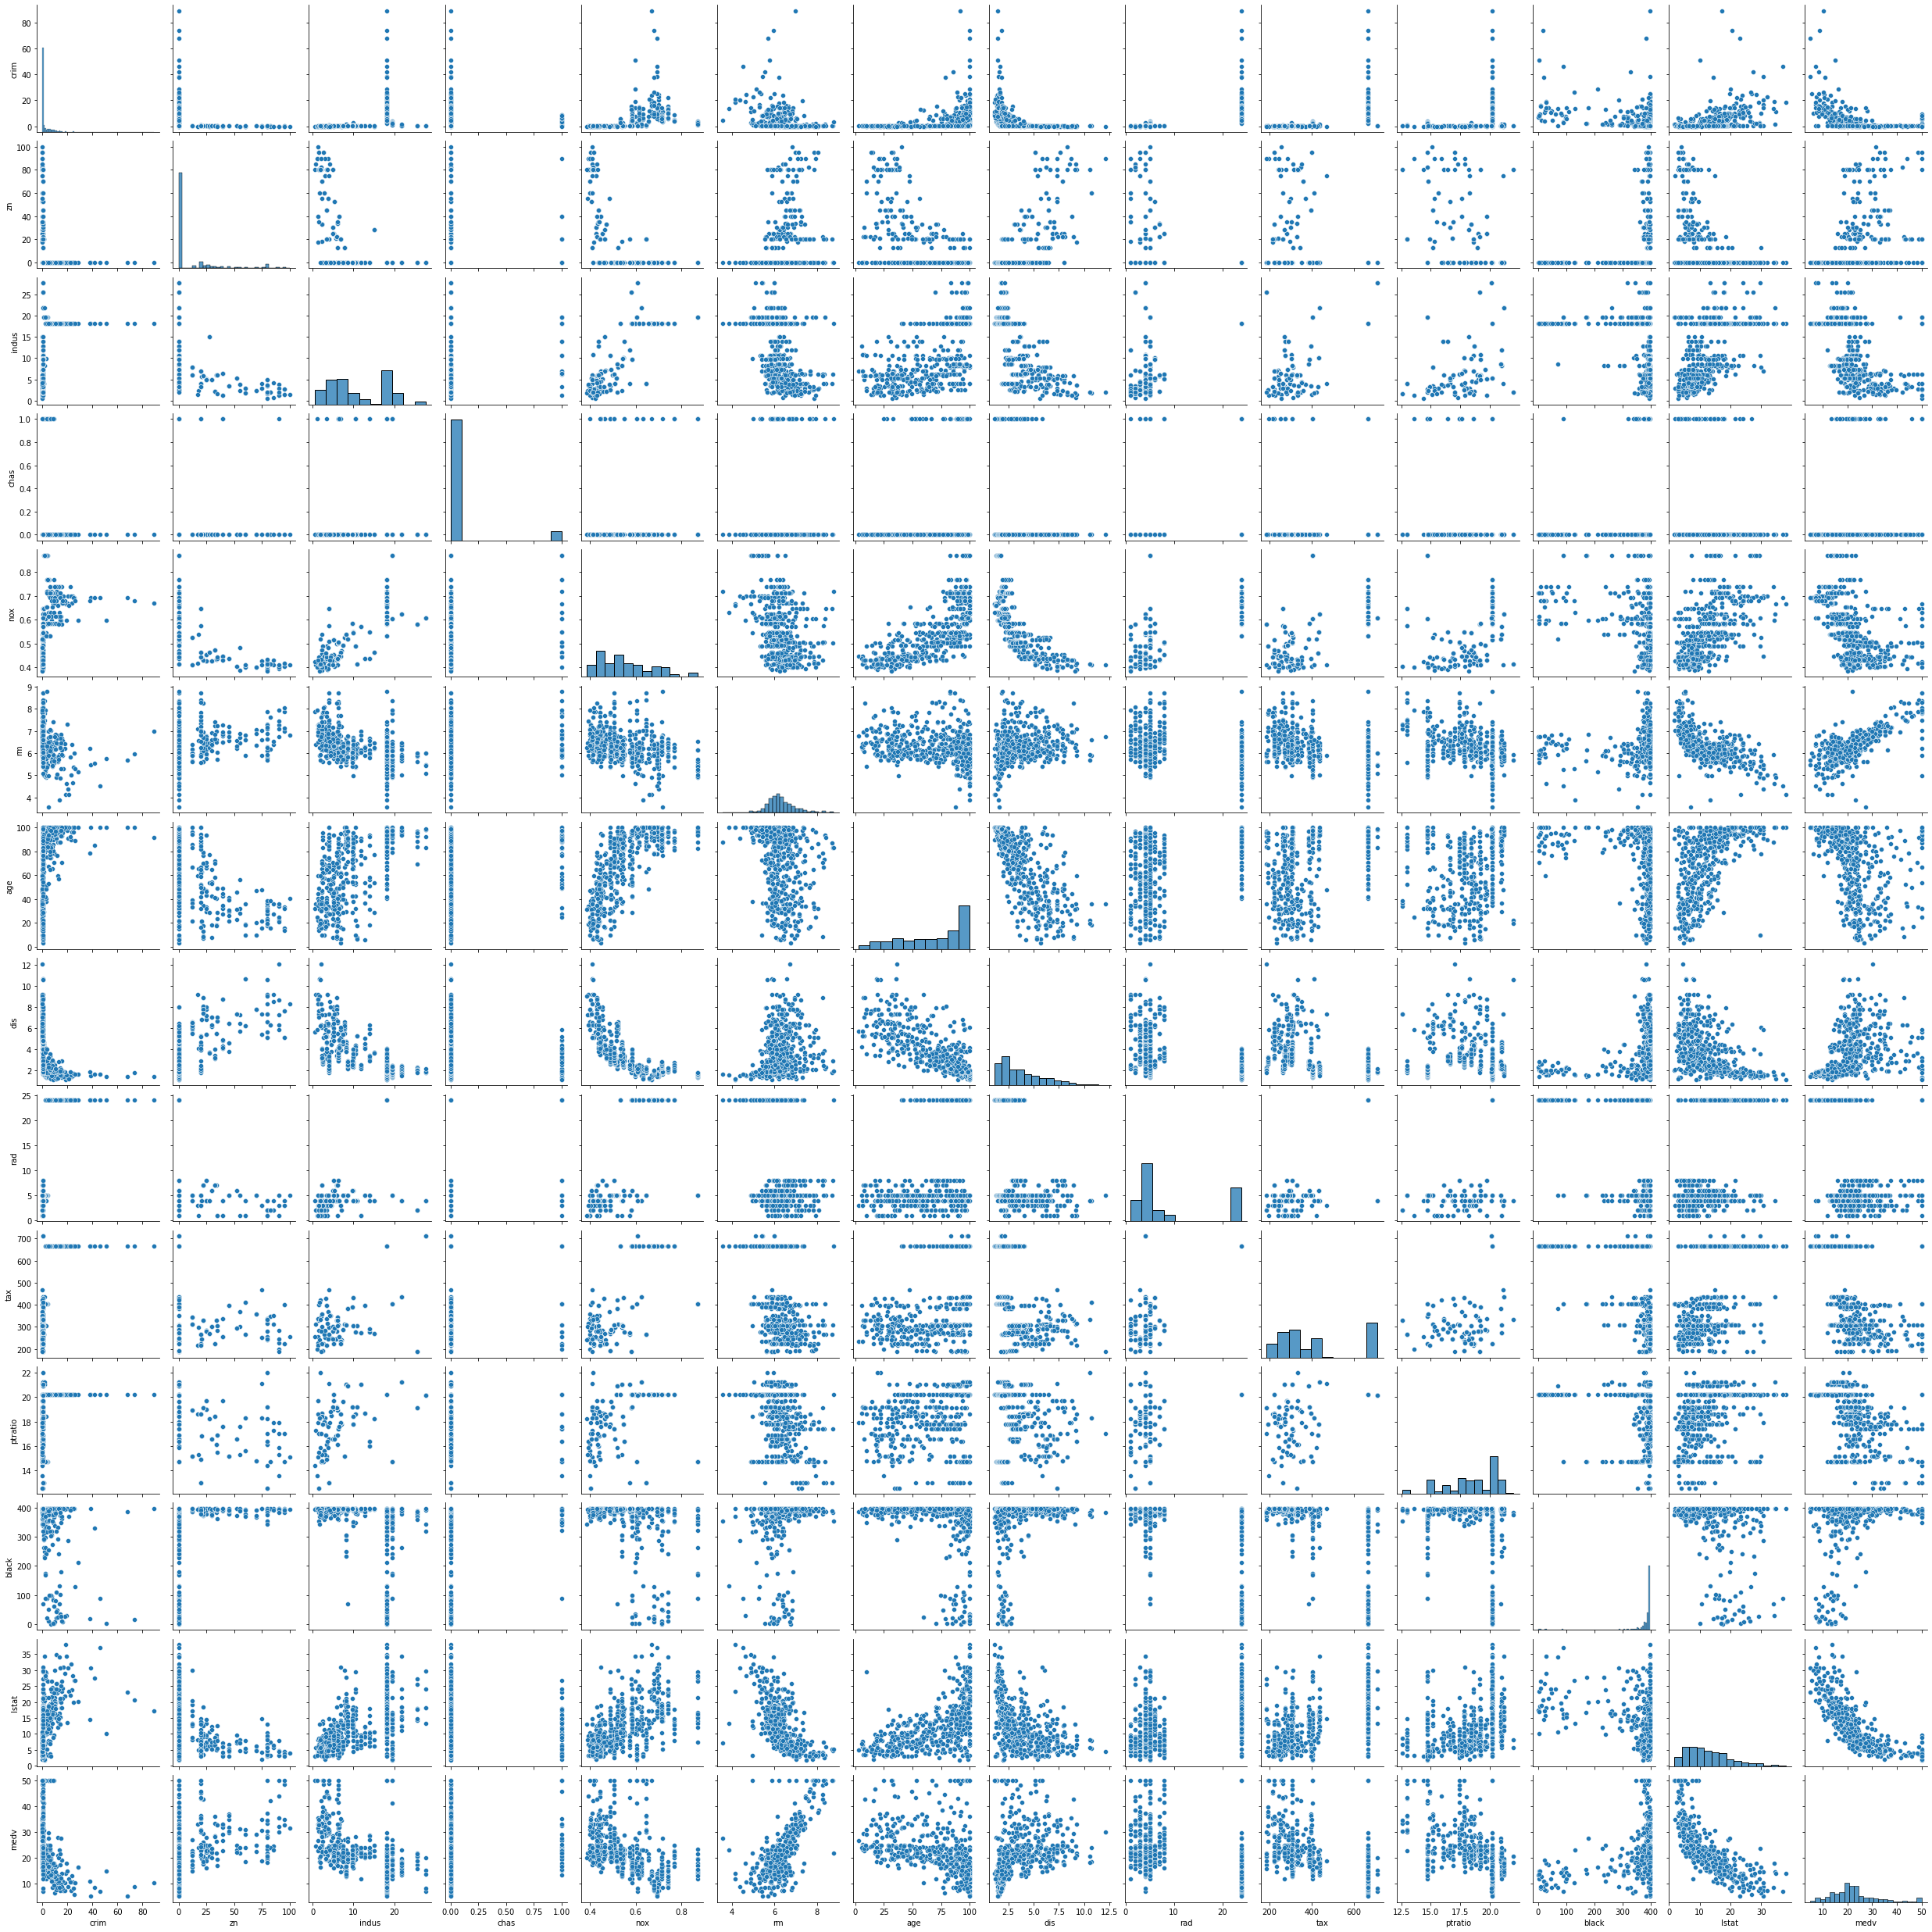

In [5]:
%matplotlib inline 
# make pairplot
sns.pairplot(df)


## Create the Feature Matrix X and Target Vector y

- X: include all columns except MEDV
- y: include only the target column MEDV

Convert the X & y dataframe objects as NumPy arrays using the NumPy "asarray" function.

In [6]:
import numpy as np

### first get y
#
# both convert medv column in df to np.array
y = df.medv.values
# y = df.medv.to_numpy()
print(y)

# then get x
X = df.drop(columns="medv").values
print(X)

print("\nDimension of X: ", X.shape)
print("\nDimension of y: ", y.shape)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3